In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ensembler_functions as ef

2025-02-18 21:24:57.174146: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 21:24:57.461143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load data with overlap removal
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

datasets = ef.load_and_preprocess_and_preprocess(data_info, overlap_removal=True, obj_type='HLT', tag='EB_test')
data_with_OR = datasets['EB_test']['HLT_preprocessed_data']
del datasets


# load data without overlap removal
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

datasets = ef.load_and_preprocess_and_preprocess(data_info, overlap_removal=False, obj_type='HLT', tag='EB_test')
data_without_OR = datasets['EB_test']['HLT_preprocessed_data']
del datasets

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

In [3]:
def get_multiplicity(data, start_idx, n_objects, n_features=3):
    """
    Counts how many objects (with pT > 0) are present in each event.

    Parameters
    ----------
    data : np.ndarray
        The array of shape (N, 48) containing pT, eta, phi for each object.
    start_idx : int
        The index in 'data' at which the object block starts.
    n_objects : int
        How many objects of this type are encoded (e.g. 6 jets).
    n_features : int
        Number of features for each object (default 3: pT, eta, phi).

    Returns
    -------
    multiplicities : np.ndarray
        1D array of length N with the counted multiplicities per event.
    """
    N = data.shape[0]
    multiplicities = np.zeros(N, dtype=int)
    for i in range(n_objects):
        pt = data[:, start_idx + i * n_features]
        multiplicities += (pt > 0).astype(int)
    return multiplicities

In [4]:
jet_mult_with_OR     = get_multiplicity(data_with_OR,     start_idx=0,  n_objects=6)
jet_mult_without_OR  = get_multiplicity(data_without_OR,  start_idx=0,  n_objects=6)

ele_mult_with_OR     = get_multiplicity(data_with_OR,     start_idx=18, n_objects=3)
ele_mult_without_OR  = get_multiplicity(data_without_OR,  start_idx=18, n_objects=3)

mu_mult_with_OR      = get_multiplicity(data_with_OR,     start_idx=27, n_objects=3)
mu_mult_without_OR   = get_multiplicity(data_without_OR,  start_idx=27, n_objects=3)

ph_mult_with_OR      = get_multiplicity(data_with_OR,     start_idx=36, n_objects=3)
ph_mult_without_OR   = get_multiplicity(data_without_OR,  start_idx=36, n_objects=3)

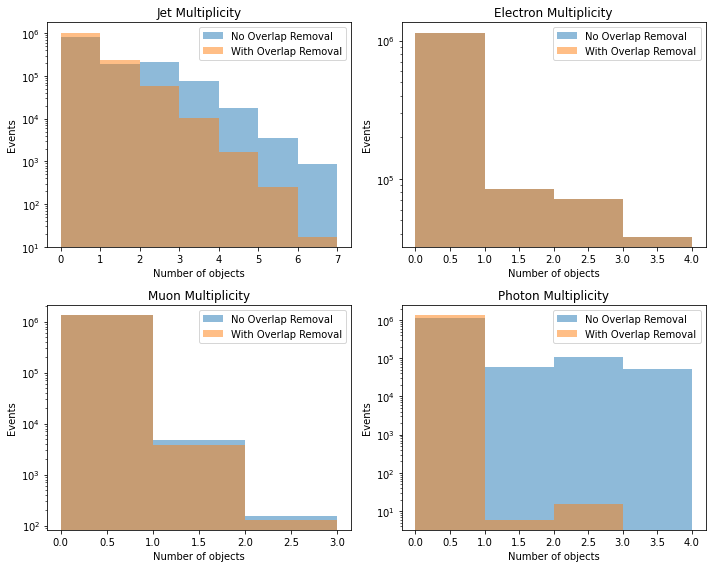

In [6]:
# -------------------------------------------------------
# Make comparison plots
# -------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Helper to plot histograms side by side
def plot_multiplicity(ax, mult_noOR, mult_withOR, label):
    bins = np.arange(0, mult_noOR.max() + 2)  # up to max multiplicity + 1
    ax.hist(mult_noOR, bins=bins, alpha=0.5, label="No Overlap Removal")
    ax.hist(mult_withOR, bins=bins, alpha=0.5, label="With Overlap Removal")
    ax.set_title(f"{label} Multiplicity")
    ax.set_xlabel("Number of objects")
    ax.set_ylabel("Events")
    ax.set_yscale('log')
    ax.legend()

plot_multiplicity(axes[0, 0], jet_mult_without_OR, jet_mult_with_OR, "Jet")
plot_multiplicity(axes[0, 1], ele_mult_without_OR, ele_mult_with_OR, "Electron")
plot_multiplicity(axes[1, 0], mu_mult_without_OR,  mu_mult_with_OR,  "Muon")
plot_multiplicity(axes[1, 1], ph_mult_without_OR,  ph_mult_with_OR,  "Photon")



plt.tight_layout()
plt.show()

### ttbar

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

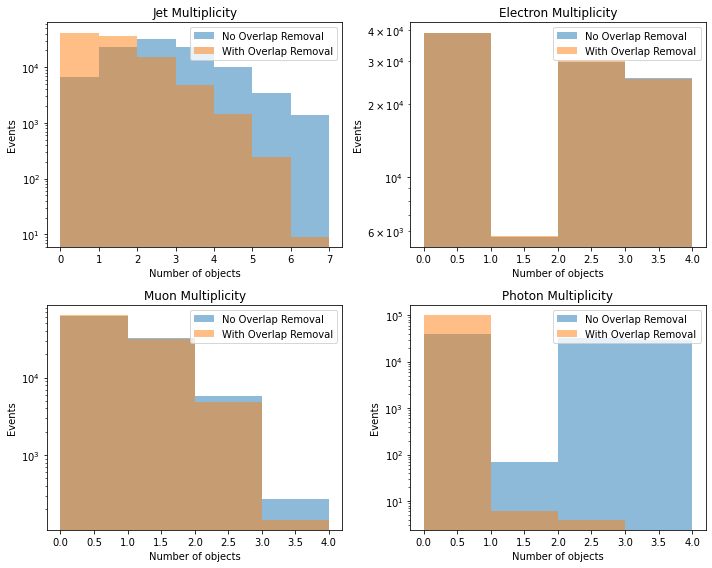

In [9]:
# load data with overlap removal
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

datasets = ef.load_and_preprocess_and_preprocess(data_info, overlap_removal=True, obj_type='HLT', tag='mc23e_ttbar_2lep')
data_with_OR = datasets['mc23e_ttbar_2lep']['HLT_preprocessed_data']
del datasets


# load data without overlap removal
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

datasets = ef.load_and_preprocess_and_preprocess(data_info, overlap_removal=False, obj_type='HLT', tag='mc23e_ttbar_2lep')
data_without_OR = datasets['mc23e_ttbar_2lep']['HLT_preprocessed_data']
del datasets


jet_mult_with_OR     = get_multiplicity(data_with_OR,     start_idx=0,  n_objects=6)
jet_mult_without_OR  = get_multiplicity(data_without_OR,  start_idx=0,  n_objects=6)

ele_mult_with_OR     = get_multiplicity(data_with_OR,     start_idx=18, n_objects=3)
ele_mult_without_OR  = get_multiplicity(data_without_OR,  start_idx=18, n_objects=3)

mu_mult_with_OR      = get_multiplicity(data_with_OR,     start_idx=27, n_objects=3)
mu_mult_without_OR   = get_multiplicity(data_without_OR,  start_idx=27, n_objects=3)

ph_mult_with_OR      = get_multiplicity(data_with_OR,     start_idx=36, n_objects=3)
ph_mult_without_OR   = get_multiplicity(data_without_OR,  start_idx=36, n_objects=3)


# -------------------------------------------------------
# Make comparison plots
# -------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Helper to plot histograms side by side
def plot_multiplicity(ax, mult_noOR, mult_withOR, label):
    bins = np.arange(0, mult_noOR.max() + 2)  # up to max multiplicity + 1
    ax.hist(mult_noOR, bins=bins, alpha=0.5, label="No Overlap Removal")
    ax.hist(mult_withOR, bins=bins, alpha=0.5, label="With Overlap Removal")
    ax.set_title(f"{label} Multiplicity")
    ax.set_xlabel("Number of objects")
    ax.set_ylabel("Events")
    ax.set_yscale('log')
    ax.legend()

plot_multiplicity(axes[0, 0], jet_mult_without_OR, jet_mult_with_OR, "Jet")
plot_multiplicity(axes[0, 1], ele_mult_without_OR, ele_mult_with_OR, "Electron")
plot_multiplicity(axes[1, 0], mu_mult_without_OR,  mu_mult_with_OR,  "Muon")
plot_multiplicity(axes[1, 1], ph_mult_without_OR,  ph_mult_with_OR,  "Photon")



plt.tight_layout()
plt.show()

### RS Graviton

Loaded A14N23LO from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/A14N23LO.h5
Loaded EB_473255 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_473255.h5
Loaded EB_475321 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_475321.h5
Loaded EB_482596 from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/EB_482596.h5
Loaded HAHMggfZdZd2l2nu from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HAHMggfZdZd2l2nu.h5
Loaded HHbbttHadHad from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HHbbttHadHad.h5
Loaded HLT_noalg_eb_L1All from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/HLT_noalg_eb_L1All.h5
Loaded ZZ4lep from /eos/home-m/mmcohen/ad_trigger_development/data/loaded_and_matched_ntuples/02-03-2025/ZZ4lep.h5
Lo

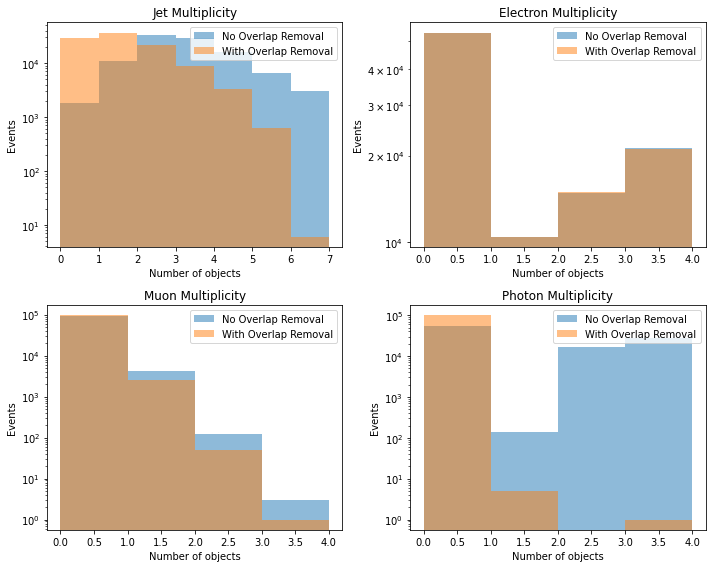

In [10]:
# load data with overlap removal
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

datasets = ef.load_and_preprocess_and_preprocess(data_info, overlap_removal=True, obj_type='HLT', tag='mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300')
data_with_OR = datasets['mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300']['HLT_preprocessed_data']
del datasets


# load data without overlap removal
data_info = {
    "train_data_scheme": "topo2A_train", 
    "pt_normalization_type": "global_division", 
    "L1AD_rate": 1000, 
    "pt_thresholds": [50, 30, 30, 30], 
    "pt_scale_factor": 0.05,
    "comments": ""
}

datasets = ef.load_and_preprocess_and_preprocess(data_info, overlap_removal=False, obj_type='HLT', tag='mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300')
data_without_OR = datasets['mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300']['HLT_preprocessed_data']
del datasets


jet_mult_with_OR     = get_multiplicity(data_with_OR,     start_idx=0,  n_objects=6)
jet_mult_without_OR  = get_multiplicity(data_without_OR,  start_idx=0,  n_objects=6)

ele_mult_with_OR     = get_multiplicity(data_with_OR,     start_idx=18, n_objects=3)
ele_mult_without_OR  = get_multiplicity(data_without_OR,  start_idx=18, n_objects=3)

mu_mult_with_OR      = get_multiplicity(data_with_OR,     start_idx=27, n_objects=3)
mu_mult_without_OR   = get_multiplicity(data_without_OR,  start_idx=27, n_objects=3)

ph_mult_with_OR      = get_multiplicity(data_with_OR,     start_idx=36, n_objects=3)
ph_mult_without_OR   = get_multiplicity(data_without_OR,  start_idx=36, n_objects=3)


# -------------------------------------------------------
# Make comparison plots
# -------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Helper to plot histograms side by side
def plot_multiplicity(ax, mult_noOR, mult_withOR, label):
    bins = np.arange(0, mult_noOR.max() + 2)  # up to max multiplicity + 1
    ax.hist(mult_noOR, bins=bins, alpha=0.5, label="No Overlap Removal")
    ax.hist(mult_withOR, bins=bins, alpha=0.5, label="With Overlap Removal")
    ax.set_title(f"{label} Multiplicity")
    ax.set_xlabel("Number of objects")
    ax.set_ylabel("Events")
    ax.set_yscale('log')
    ax.legend()

plot_multiplicity(axes[0, 0], jet_mult_without_OR, jet_mult_with_OR, "Jet")
plot_multiplicity(axes[0, 1], ele_mult_without_OR, ele_mult_with_OR, "Electron")
plot_multiplicity(axes[1, 0], mu_mult_without_OR,  mu_mult_with_OR,  "Muon")
plot_multiplicity(axes[1, 1], ph_mult_without_OR,  ph_mult_with_OR,  "Photon")



plt.tight_layout()
plt.show()